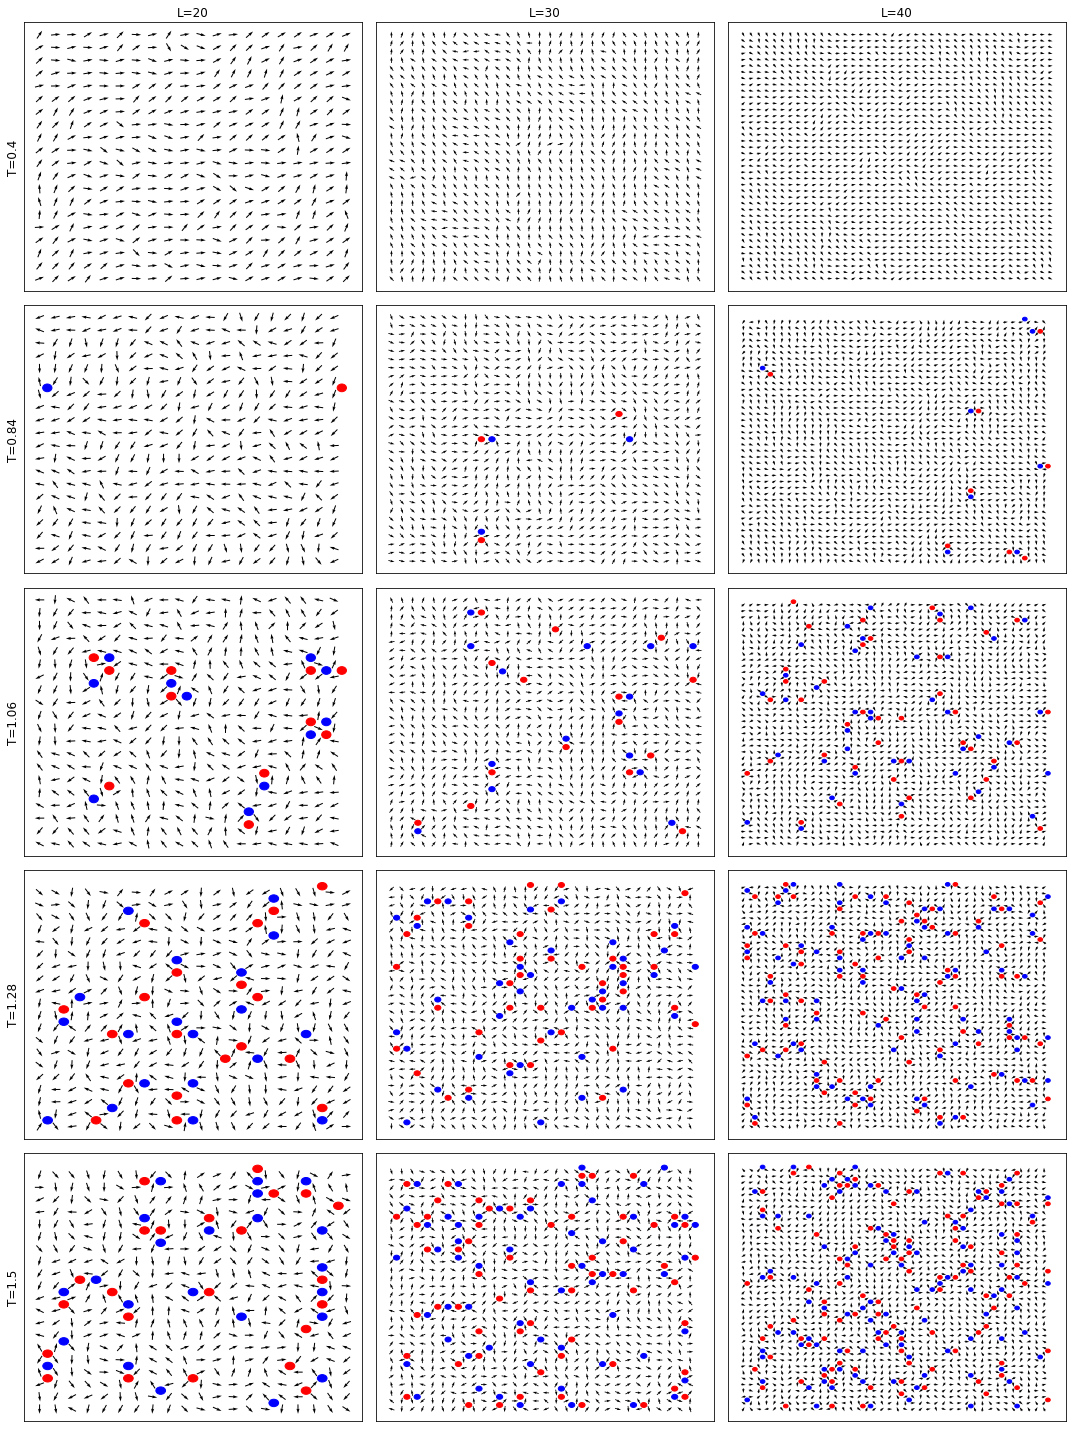

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Función para cargar las configuraciones
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

# Función para calcular la vorticidad de la configuración
def calculate_vorticity(config, L):
    tpi = 2 * np.pi
    vorticity_map = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            platt1 = config[i, j]
            platt1shiftX = config[(i+1) % L, j]
            platt1shiftY = config[i, (j+1) % L]
            platt1shiftXshiftY = config[(i+1) % L, (j+1) % L]
            
            platt1v = np.mod(platt1, tpi)
            platt1shiftXv = np.mod(platt1shiftX, tpi)
            platt1shiftXshiftYv = np.mod(platt1shiftXshiftY, tpi)
            platt1shiftYv = np.mod(platt1shiftY, tpi)
            diff_list1 = np.array([platt1v - platt1shiftXv, platt1shiftXv - platt1shiftXshiftYv, platt1shiftXshiftYv - platt1shiftYv, platt1shiftYv - platt1v])
            
            vort_here = 0.0
            for ll_1 in diff_list1:
                if ll_1 > np.pi:
                    ll_1 -= tpi
                if ll_1 < -np.pi:
                    ll_1 += tpi
                ll_1 /= tpi
                vort_here += ll_1
            
            vorticity_map[i, j] = vort_here
    return vorticity_map

# Directorios para cada longitud 
base_dirs = {
    20: 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\confbuenaL=20',  # Reemplaza con la ruta adecuada
    30: 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\confbuenaL=30',  # Reemplaza con la ruta adecuada
    40: 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\confbuenaL=40'   # Reemplaza con la ruta adecuada
}

# Temperaturas a mostrar
temperatures = [0.4, 0.84, 1.06, 1.28, 1.5]  # Ajustar según sea necesario

# Longitudes del sistema
lengths = [20, 30, 40]


fig, axes = plt.subplots(len(temperatures), len(lengths), figsize=(15, 20))

for i, temp in enumerate(temperatures):
    for j, L in enumerate(lengths):
        temp_str = str(int(temp * 10000)).zfill(5)
        file_path = os.path.join(base_dirs[L], f'configatT={temp_str}.data')
        
        
        config = load_and_normalize_config(file_path).reshape(L, L)
        
       
        vorticity = calculate_vorticity(config, L)
        
        
        x, y = np.meshgrid(np.arange(L), np.arange(L))
        u = np.cos(config)
        v = np.sin(config)
        
        ax = axes[i, j]
        ax.quiver(x, y, u, v, pivot='middle')
        
        
        for ii in range(L):
            for jj in range(L):
                if np.isclose(vorticity[ii, jj], 1.0, atol=0.1):
                    ax.add_patch(plt.Circle((jj + 0.5, ii + 0.5), 0.3, color='red', fill=True))
                elif np.isclose(vorticity[ii, jj], -1.0, atol=0.1):
                    ax.add_patch(plt.Circle((jj + 0.5, ii + 0.5), 0.3, color='blue', fill=True))

        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f'T={temp}', fontsize=12)
        if i == 0:
            ax.set_title(f'L={L}', fontsize=12)

            

plt.tight_layout()
plt.savefig('comparacionconfigs.pdf')
plt.show()

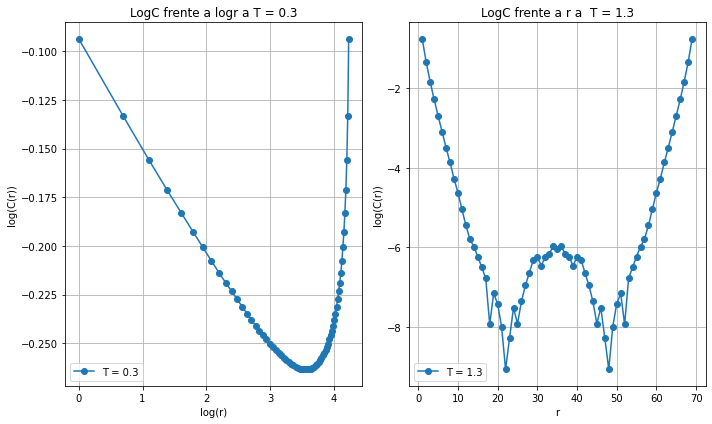

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os


def load_mean_correlations(filename):
    return np.loadtxt(filename)

#Función para representar la función de correlación en un plot log-log o en un plot log-lineal
def plot_log_correlations(mean_corr1, mean_corr2, temp1, temp2):
    r = np.arange(1, len(mean_corr1) + 1)
    
    plt.figure(figsize=(10, 6))
    
    
    plt.subplot(1, 2, 1)
    plt.plot(np.log(r), np.log(mean_corr1), 'o-', label=f'T = {temp1}')
    plt.xlabel('log(r)')
    plt.ylabel('log(C(r))')
    plt.title(f'LogC frente a logr a T = {temp1}')
    plt.grid(True)
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(r, np.log(mean_corr2), 'o-', label=f'T = {temp2}')
    plt.xlabel('r')
    plt.ylabel('log(C(r))')
    plt.title(f'LogC frente a r a  T = {temp2}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('comparacioncorr.pdf')
    plt.show()


def main():
    directory = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\configparallelcorr=70'  # Cambiar esta ruta según sea necesario
    temp1 = 0.3
    temp2 = 1.3
    
    temp1_str = str(int(temp1 * 10000)).zfill(5)
    temp2_str = str(int(temp2 * 10000)).zfill(5)
    
    mean_corr_file1 = os.path.join(directory, f'mean_corratT={temp1_str}.data')
    mean_corr_file2 = os.path.join(directory, f'mean_corratT={temp2_str}.data')
    
    mean_corr1 = load_mean_correlations(mean_corr_file1)
    mean_corr2 = load_mean_correlations(mean_corr_file2)
    
    plot_log_correlations(mean_corr1, mean_corr2, temp1, temp2)


if __name__ == "__main__":
    main()


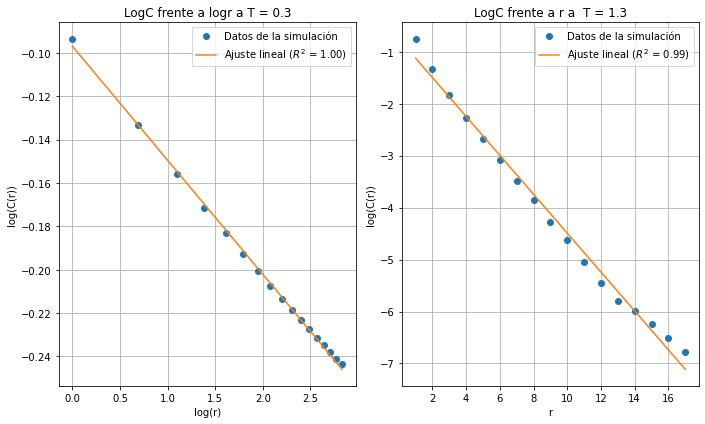

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress

def load_mean_correlations(filename):
    return np.loadtxt(filename)


#Función para representar la selección de datos y realizar los ajustes lineales
def plot_log_correlations(mean_corr1, mean_corr2, temp1, temp2, L):
    r = np.arange(1, 18) #Cambiar este rango según sea necesario
    
    plt.figure(figsize=(10, 6))
    
    
    plt.subplot(1, 2, 1)
    log_r = np.log(r)
    log_mean_corr1 = np.log(mean_corr1[:17]) #Cambiar el rango según sea necesario
    
    # Ajuste lineal de la primera correlación
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(log_r, log_mean_corr1)
    fit1 = slope1 * log_r + intercept1
    r_squared1 = r_value1**2
    
    plt.plot(log_r, log_mean_corr1, 'o', label=f'Datos de la simulación')
    plt.plot(log_r, fit1, label=f'Ajuste lineal ($R^2$ = {r_squared1:.2f})')
    plt.xlabel('log(r)')
    plt.ylabel('log(C(r))')
    plt.title(f'LogC frente a logr a T = {temp1}')
    plt.grid(True)
    plt.legend()

    
    plt.subplot(1, 2, 2)
    log_mean_corr2 = np.log(mean_corr2[:17])
    
    # Ajuste lineal de la segunda correlación
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(r, log_mean_corr2)
    fit2 = slope2 * r + intercept2
    r_squared2 = r_value2**2
    
    plt.plot(r, log_mean_corr2, 'o', label=f'Datos de la simulación')
    plt.plot(r, fit2, label=f'Ajuste lineal ($R^2$ = {r_squared2:.2f})')
    plt.xlabel('r')
    plt.ylabel('log(C(r))')
    plt.title(f'LogC frente a r a  T = {temp2}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('corrlineales.pdf')
    plt.show()


def main():
    directory = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\configparallelcorr=70'  # Cambiar esta ruta según sea necesario
    temp1 = 0.3
    temp2 = 1.3
    L = 70          #Cambiar dependiendo de la longitud que se esté teniendo en cuennta
    
    temp1_str = str(int(temp1 * 10000)).zfill(5)
    temp2_str = str(int(temp2 * 10000)).zfill(5)
    
    mean_corr_file1 = os.path.join(directory, f'mean_corratT={temp1_str}.data')
    mean_corr_file2 = os.path.join(directory, f'mean_corratT={temp2_str}.data')
    
    mean_corr1 = load_mean_correlations(mean_corr_file1)
    mean_corr2 = load_mean_correlations(mean_corr_file2)
    
    plot_log_correlations(mean_corr1, mean_corr2, temp1, temp2, L)


if __name__ == "__main__":
    main()